<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>




<h3 style="color:blue">Home price prediction</h3>

###Intro

Below table represents current home prices in gujarat township based on square feet area, you want to predict price of 

<img src="https://github.com/rahulvansh66/Machine-Learning-Course-Work/blob/main/1_linear_reg/homepricetable.JPG?raw=1" style="width:370px;height:250px">

**Problem Statement**: Given data (area, price) build a machine learning model that can predict home prices based on square feet area


You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart. 

<img src="https://github.com/rahulvansh66/Machine-Learning-Course-Work/blob/main/1_linear_reg/scatterplot.JPG?raw=1" style="width:600px;height:370px">

You can draw multiple lines like this but we have to find and choose the one where total sum of error is minimum. here, error is squred to avoid -ve value.

<img src="https://github.com/rahulvansh66/Machine-Learning-Course-Work/blob/main/1_linear_reg/equation.PNG?raw=1" style="width:600px;height:370px" >

Home prices can be presented as following equation,

home price = m * (area) + b

finding best fit line means findig value of m and b that can predict with minimum passible error.
Generic form of same equation is,

<img src="https://github.com/rahulvansh66/Machine-Learning-Course-Work/blob/main/1_linear_reg/linear_equation.png?raw=1" >

### Import library and mount gdrive

In [48]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')
#drive.mount('/content/drive/MyDrive/Colab-Notebooks/ML_Practice/Machine-Learning-Course-Work/1_linear_reg')
#/content/drive/MyDrive/Colab-Notebooks/ML_Practice/Machine-Learning-Course-Work

Mounted at /content/drive


In [4]:
'''
#You can access your folder as shown below 
path_to_data = '/content/gdrive/My Drive/MyFolder_where_data_stored' 
Unique_Labels_List = os.listdir(path_to_data)
'''

#Change directory to your repository folder
%cd 'drive/MyDrive/Colab-Notebooks/ML_Practice/Machine-Learning-Course-Work/1_linear_reg'
!ls

/content/drive/MyDrive/Colab-Notebooks/ML_Practice/Machine-Learning-Course-Work/1_linear_reg
1_linear_regression.ipynb  error_equation.jpg  linear_equation.png
areas.csv		   Exercise	       linearReg.py
different_lines.JPG	   homeprices.csv      prediction.csv
equation.PNG		   homepricetable.JPG  scatterplot.JPG


### Applying regression using scikit learn

In [40]:
# fetch data from csv
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


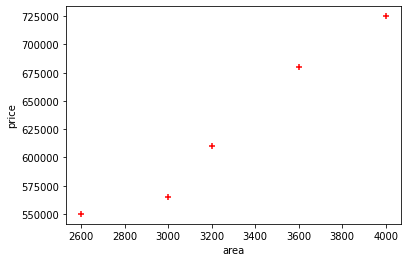

In [6]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')
#observe below plot, We can see that distribution suitable for linear regression.

In [33]:
new_df = df.drop('price',axis='columns')
new_df
price = df.price
price
print(df.area.ndim,df.price.ndim, new_df.ndim, price.ndim) #1 1 2 1

#<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
print(type(df.iloc[:,1].values), type(df.iloc[:,1]), df.iloc[:,1].values.ndim, df.iloc[:,1].ndim) #dim 1 , dim 1 ie. 1d array


(new_df.ndim)
new_df.shape

(5, 1)

Passing `df.area` as x to `reg.fit()` will throw error because it's 1d array [2,3,5], whereas it expact 2d array as x, so df.area.values.reshape(-1, 1)  will convert it to 2d array ie. [ [ 2,3,5 ] ]

another way is `df.iloc[:,1].values` ie. take all col before 1 that is col 0

In [39]:
#  use of only df.area will throw AttributeError: 'Series' object has no attribute 'reshape'
#  df.area.values will return np arry, so it have respace method
area_1d_to_2d = df.area.values.reshape(-1, 1) 
#print(df.area, area_1d_to_2d)

1 1 2 1
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'> 1 1
1 2
0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64 [[2600]
 [3000]
 [3200]
 [3600]
 [4000]]


In [32]:
# Create linear regression object
reg = linear_model.LinearRegression()

# fitting line = training model
reg.fit(area_1d_to_2d ,df.price)

LinearRegression()

### Prediction and analysis

**(1) Predict price of a home with area = 3300 sqr ft**

In [44]:
X  = reg.predict([[3300]]) #Expected 2D array so [ [val] ]
X

array([628715.75342466])

In [45]:
m = reg.coef_
b = reg.intercept_
print( m, b)# best value of m and b that give minimum possible error, ie which give best fit line

[135.78767123] 180616.43835616432


**Y = m * X + b (m is coefficient and b is intercept)**

observe it gives same value predict by model `reg.predict()` , so behind `predict()` this formula is being used.

In [46]:
Y = m * X + b  # 3300 * 135.78767123 + 180616.43835616432 

**(1) Predict price of a home with area = 5000 sqr ft**

In [ ]:
reg.predict([[5000]])

array([859554.79452055])

<h3 style="color:purple">Generate CSV file with list of home price predictions</h3>

In [ ]:
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [ ]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [ ]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [ ]:
area_df.to_csv("prediction.csv")

### <h3>Exercise</h3>

<p >Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020</p>

<h3>Answer</h3>

41288.69409442

In [56]:
df = pd.read_csv('Exercise/canada_per_capita_income.csv')
df.head(3)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484


In [61]:
# we want to predict income 
# based on year ie given the year
x = df.year.values.reshape(-1,1) # x is given value, independent var
y = df['per capita income (US$)'] # y dependent var, prediction based on what? x ie year
reg = linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [62]:
reg.predict([[2020]])

array([41288.69409442])